# Feature Engineering (FE) & EDA Assignment 4

### Introduction 
In this assignment, I will use "inpatientCharges.csv" dataset to do EDA and feature engineering. I will create 15 feature in 4 subsections to learn the demographical, provider size and ratio of media to toal average by state and DRG.

### Part 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('inpatientCharges.csv')

In [3]:
data.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.00,163065.00,163065.00
mean,255569.87,47938.12,42.78
std,151563.67,27854.32,51.10
min,10001.00,1040.00,11.00
25%,110092.00,27261.00,17.00
50%,250007.00,44309.00,27.00
75%,380075.00,72901.00,49.00
max,670077.00,99835.00,3383.00


In [4]:
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [6]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [7]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [8]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [9]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/h5/5b7_hbjj0090vtlzc7lw_b3r0000gn/T/ipykernel_28762/2932651901.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Total_Payments'] = (data['Average_Total_Payments']
/var/folders/h5/5b7_hbjj0090vtlzc7lw_b3r0000gn/T/ipykernel_28762/2932651901.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


### Part 2 EDA

#### 2.1 Distribution Plots

In [11]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count   163065.00
mean      9707.47
std       7664.64
min       2673.00
25%       5234.50
50%       7214.10
75%      11286.40
max     156158.18
Name: Average_Total_Payments, dtype: float64

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

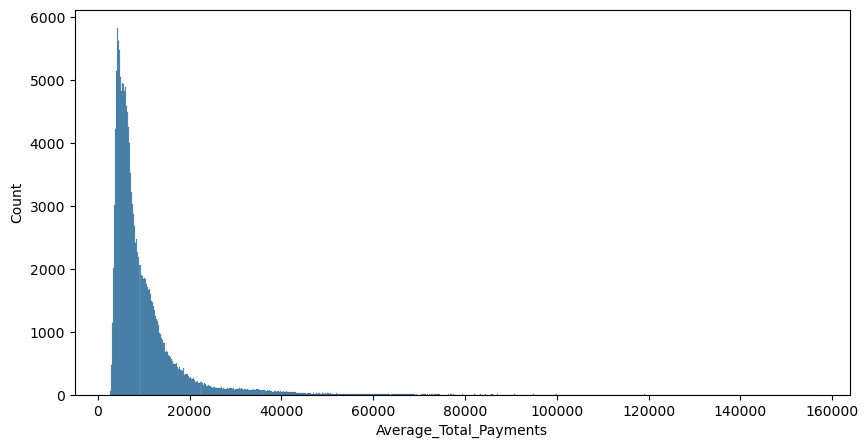

In [12]:
plt.figure(figsize=(10,5)) 
sns.histplot(data['Average_Total_Payments'])

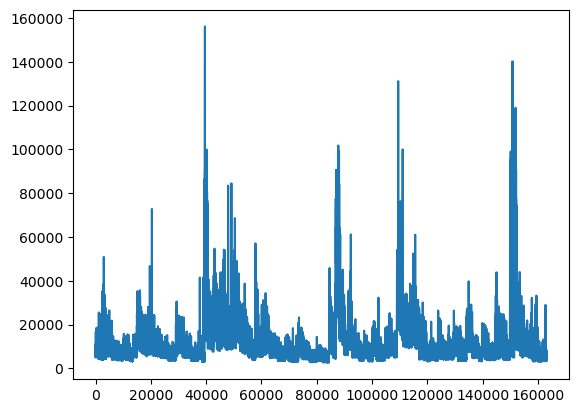

In [13]:
plt.plot(data['Average_Total_Payments'])

#### From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

#### 2.2 Count by State

In [14]:
data['Provider_State'].value_counts()

CA    13064
TX    11864
FL    11155
NY     9178
IL     7909
PA     7804
OH     7012
MI     5419
NC     5041
GA     4968
NJ     4826
VA     4332
IN     4260
TN     4168
MO     4059
MA     3842
AL     3635
MD     3330
KY     3229
LA     3027
AZ     2851
SC     2847
WI     2834
WA     2778
OK     2520
MS     2410
MN     2252
AR     2067
CT     2011
CO     1890
IA     1734
KS     1638
WV     1589
OR     1299
NV     1202
NE     1062
NM      917
ME      888
NH      823
UT      732
RI      588
ID      551
MT      506
SD      486
DC      462
HI      442
ND      422
DE      394
VT      270
WY      247
AK      231
Name: Provider_State, dtype: int64

<Figure size 1500x500 with 0 Axes>

<AxesSubplot:xlabel='Provider_State', ylabel='count'>

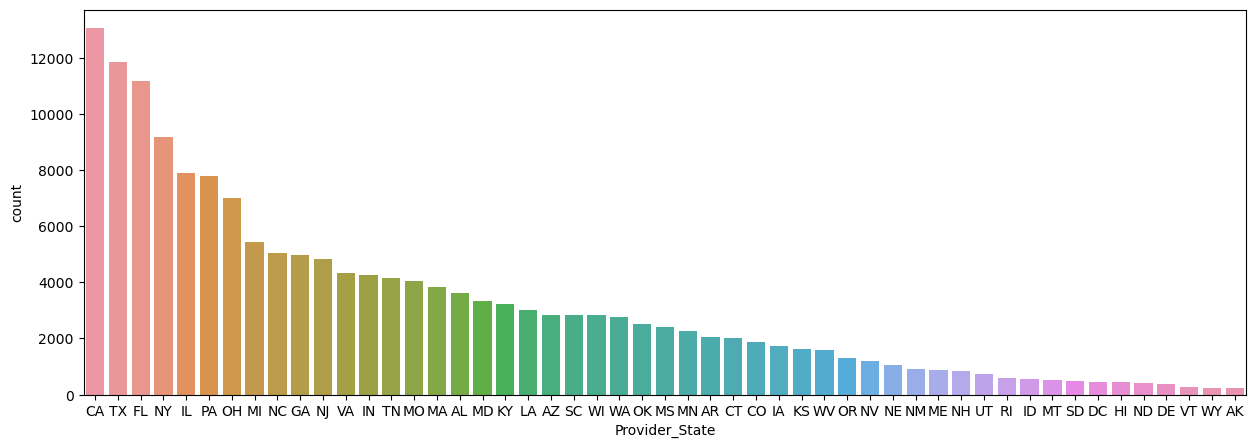

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
ax = plt.gca()
plt.rcParams["axes.labelsize"] = 20

#### From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

#### 2.3 Count of top 20 cities

In [16]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

<Figure size 1500x500 with 0 Axes>

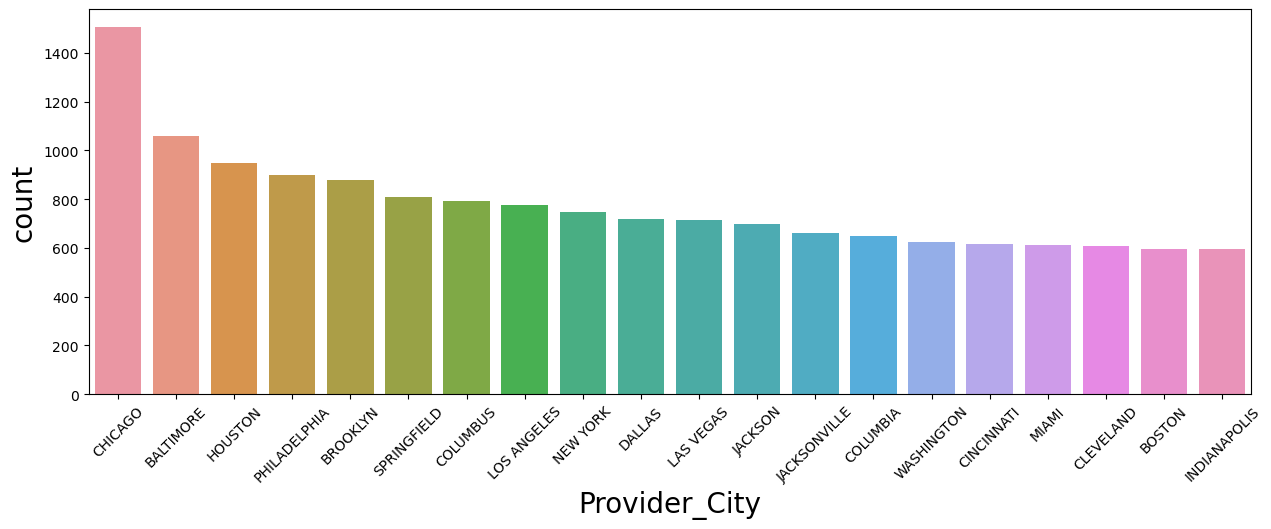

In [17]:
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

In [18]:
data.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.00,6960.53,1477.87,4968.00,6001.83,6582.89,7516.82,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.00,6706.28,2033.97,4194.09,5412.87,6093.75,7345.36,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.00,13263.82,3847.92,8174.28,10762.22,12084.70,14424.33,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.00,7922.67,2084.66,5368.73,6626.27,7280.05,8503.06,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.00,5713.99,1342.54,3916.41,4819.32,5326.02,6197.48,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.00,6968.72,2440.28,4444.90,5477.24,6155.56,7841.28,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.00,4949.91,1462.46,3172.44,3969.97,4529.53,5440.68,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.00,10763.81,2823.00,6942.83,8851.45,10062.28,11788.67,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.00,4485.38,1154.33,3040.72,3720.57,4136.10,4879.39,12479.80


#### Thought process on Discussion: The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

Yes, it does make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES" in terms of average Medicare payments by DRG. Comparing different DRGs (Diagnosis Related Groups) can provide insights into how Medicare payments vary across different medical conditions and procedures.

The mean Medicare payment for "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" is approximately $10,763.81, and for  "885 - PSYCHOSES" is approximately 6,968.72.
Comparing these mean values can show how the average Medicare payments associated with these specific medical conditions.Additionally, considering other statistical measures like standard deviation, quartiles, etc., can provide a more comprehensive understanding of the distribution and variability of Medicare payments for these DRGs.

### Part 3 Feature Engineering

### Sub-section 3.1: Demographics and Location Features

In [68]:
# Convert Categorical columns to strings
data['Provider_City'] = data['Provider_City'].astype(str)
data['Provider_State'] = data['Provider_State'].astype(str)

In [69]:
# Feature 1: 'City_State' - Concatenate Provider_City and Provider_State
data['City_State'] = data['Provider_City'] + ', ' + data['Provider_State']

In [21]:
# Feature 2: 'City_Zip' - Concatenate Provider_City and Provider_Zipcode
data['City_Zip'] = data['Provider_City'] + ', ' + data['Provider_Zipcode'].astype(str)

In [22]:
# Feature 3: 'Location_Group' - Group Provider locations based on Hospital_referral_region_desp
location_groups = data.groupby('Hospital_referral_region_desp')['City_State'].apply(lambda x: ', '.join(x))
data['Location_Group'] = data['Hospital_referral_region_desp'].map(location_groups)

In [23]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,City_State,City_Zip,Location_Group
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,"DOTHAN, AL","DOTHAN, 36301","DOTHAN, AL, DOTHAN, AL, DOTHAN, AL, ENTERPRISE..."
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,"BOAZ, AL","BOAZ, 35957","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS..."
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,"FLORENCE, AL","FLORENCE, 35631","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS..."
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,"BIRMINGHAM, AL","BIRMINGHAM, 35235","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS..."
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,"ALABASTER, AL","ALABASTER, 35007","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS..."


#### Summary of insights for Demographics and Location Features
- These features provide insights into the geographical distribution of healthcare providers.
1. **City_State**: Concatenation of 'Provider_City' and 'Provider_State', giving the city and state of the provider.
2. **City_Zip**: Concatenation of 'Provider_City' and 'Provider_Zipcode', providing the city and zipcode of the provider.
3. **Location_Group**: Groups provider locations based on 'Hospital_referral_region_desp', aggregating cities and states in each region.
- Understanding location patterns can help in targeting specific regions for healthcare interventions and resource allocation.

### Sub-section 3.2: Payment Features

In [24]:
# Feature 4: 'Total_Payments_Per_Discharge' - Calculate payments per discharge
data['Total_Payments_Per_Discharge'] = data['Average_Total_Payments'] / data['Total_Discharges']

In [25]:
# Feature 5: 'Medicare_Payments_Per_Discharge' - Calculate Medicare payments per discharge
data['Medicare_Payments_Per_Discharge'] = data['Average_Medicare_Payment'] / data['Total_Discharges']

In [26]:
# Feature 6: 'Payment_Difference' - Calculate the difference between Medicare and total payments
data['Payment_Difference'] = data['Average_Medicare_Payment'] - data['Average_Total_Payments']

In [27]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,City_State,City_Zip,Location_Group,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,"DOTHAN, AL","DOTHAN, 36301","DOTHAN, AL, DOTHAN, AL, DOTHAN, AL, ENTERPRISE...",63.49,52.35,-1013.51
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,"BOAZ, AL","BOAZ, 35957","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",413.40,355.48,-810.86
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,"FLORENCE, AL","FLORENCE, 35631","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",226.46,185.57,-981.16
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,"BIRMINGHAM, AL","BIRMINGHAM, 35235","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",216.70,165.17,-1288.40
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,"ALABASTER, AL","ALABASTER, 35007","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",314.35,269.52,-806.89


#### Summary of insights for Payment Features
- These features provide insights into the payment structure and differences between Medicare and total payments per discharge.
4. **Total_Payments_Per_Discharge**: Calculates the payments per discharge by dividing 'Average_Total_Payments' by 'Total_Discharges'.
    - Insight: Provides the average payments made per discharge, giving an idea of the cost per patient.
5. **Medicare_Payments_Per_Discharge**: Calculates the Medicare payments per discharge by dividing 'Average_Medicare_Payment' by 'Total_Discharges'.
    - Insight: Provides the average Medicare payments made per discharge, offering insights into Medicare-related costs.
6. **Payment_Difference**: Calculates the difference between Medicare payments and total payments by subtracting 'Average_Total_Payments' from 'Average_Medicare_Payment'.
    - Insight: Highlights the difference in payments between Medicare and total, aiding in understanding financial discrepancies.
- Understanding payment patterns can help in financial planning and negotiations with healthcare providers.

### Sub-section 3: Provider Size Features

In [28]:
# Feature 7: 'Provider_Size' - Categorize providers based on Total_Discharges
bins = [0, 100, 500, 1000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Very Large']
data['Provider_Size'] = pd.cut(data['Total_Discharges'], bins=bins, labels=labels, right=False)

In [29]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,City_State,City_Zip,Location_Group,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Provider_Size
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,"DOTHAN, AL","DOTHAN, 36301","DOTHAN, AL, DOTHAN, AL, DOTHAN, AL, ENTERPRISE...",63.49,52.35,-1013.51,Small
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,"BOAZ, AL","BOAZ, 35957","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",413.40,355.48,-810.86,Small
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,"FLORENCE, AL","FLORENCE, 35631","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",226.46,185.57,-981.16,Small
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,"BIRMINGHAM, AL","BIRMINGHAM, 35235","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",216.70,165.17,-1288.40,Small
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,"ALABASTER, AL","ALABASTER, 35007","BOAZ, AL, FLORENCE, AL, BIRMINGHAM, AL, ALABAS...",314.35,269.52,-806.89,Small


#### Summary of insights for Provider Size Features
- This feature categorize providers based on the number of discharges, giving insights into their size.
7. **Provider_Size**: Categorizes providers based on 'Total_Discharges' into bins (Small, Medium, Large, Very Large).
    - Insight: Helps in understanding the size of healthcare providers based on the number of discharges.
- Understanding provider size can help in tailoring strategies for different provider categories.

### Sub-Section 3.4: Ratio of median to average total by state and by state DRG

In [30]:
# Select variables for benchmarking mean and median
selected_variables = ['Average_Total_Payments', 'Total_Discharges', 'Average_Medicare_Payment']

# Create a DataFrame for the benchmark table
benchmark_table = pd.DataFrame(columns=['Variable', 'Mean', 'Median'])

# Calculate mean and median for selected variables
for variable in selected_variables:
    mean_val = data[variable].mean()
    median_val = data[variable].median()
    benchmark_table = benchmark_table.append({'Variable': variable, 'Mean': mean_val, 'Median': median_val}, ignore_index=True)

benchmark_table

/var/folders/h5/5b7_hbjj0090vtlzc7lw_b3r0000gn/T/ipykernel_28762/1078412677.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  benchmark_table = benchmark_table.append({'Variable': variable, 'Mean': mean_val, 'Median': median_val}, ignore_index=True)
/var/folders/h5/5b7_hbjj0090vtlzc7lw_b3r0000gn/T/ipykernel_28762/1078412677.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  benchmark_table = benchmark_table.append({'Variable': variable, 'Mean': mean_val, 'Median': median_val}, ignore_index=True)
/var/folders/h5/5b7_hbjj0090vtlzc7lw_b3r0000gn/T/ipykernel_28762/1078412677.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  benchmark_table = benchmark_table.append({'Variable': variable, 'Mean': mean_val, 'Median': median

,Variable,Mean,Median
0,Average_Total_Payments,9707.47,7214.10
1,Total_Discharges,42.78,27.00
2,Average_Medicare_Payment,8494.49,6158.46


#### Outliers and skewed data have a smaller effect on the median, the median is a better measure of central tendency than the mean.

In [31]:
benchmark_by_State = data.groupby(['Provider_State'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_State.columns = ['Provider_State','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
benchmark_by_State.head()

,Provider_State,Median_Average_Total_Payments,Median_Medicare_Payment,Median_Total_Discharges
0,AK,11190.08,9594.93,20.00
1,AL,5876.37,4811.25,25.00
2,AR,6151.68,5165.30,27.00
3,AZ,7671.36,6471.11,25.00
4,CA,9378.01,8380.90,24.00


In [32]:
benchmark_by_StateDRG = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_StateDRG.columns = ['Provider_State','DRG','DRG_Median_Average_Total_Payments','DRG_Median_Medicare_Payment','DRG_Median_Total_Discharges']
benchmark_by_StateDRG.head()

,Provider_State,DRG,DRG_Median_Average_Total_Payments,DRG_Median_Medicare_Payment,DRG_Median_Total_Discharges
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.95,6413.78,23.00
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.00,8081.54,11.00
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.01,20555.26,22.50
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.05,10495.34,17.50
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.25,8372.92,18.00


In [33]:
# Feature 8: The ratio of 'Median_Average_Total_Payments' to 'Average_Total_Payments'
# Calculate the ratio of Average_Total_Payments to its median
data['Ratio_AvgTotalPayments_to_Median'] = data['Average_Total_Payments'] / data['Average_Total_Payments'].median()

In [34]:
# Feature 9: The ratio of 'Average_Medicare_Payment' to 'Median_Average_Medicare_Payment'
data['Ratio_AvgMedPayment_to_Median'] = data['Average_Medicare_Payment'] / data['Average_Medicare_Payment'].median()

In [35]:
# Feature 10: The ratio of 'Total_Discharge' to 'Median_Total_Discharge'
data['Ratio_TotalDischarges_to_Median'] = data['Total_Discharges']/data['Total_Discharges'].median()

In [37]:
# Calculate the ratio of Average_Total_Payments, Average_Medicare_Payment, and Total_Discharges to their respective medians for each DRG and Provider_State
data = data.merge(benchmark_by_StateDRG, on=['Provider_State', 'DRG'], how='left')

In [39]:
# Feature 11:The ratio of 'Average_Total_Payments' to 'DRG_Median_Average_Total_Payments'
data['Ratio_AvgTotalPayments_to_Median_DRG'] = data['Average_Total_Payments'] / data['DRG_Median_Average_Total_Payments']

In [40]:
# Feature 12: The ratio of 'Average_Medicare_Payment' to 'DRG_Median_Medicare_Payment'
data['Ratio_AvgMedPayment_to_Median_DRG'] = data['Average_Medicare_Payment'] / data['DRG_Median_Medicare_Payment']

In [41]:
# Feature 13: The ratio of 'Total_Discharges' to 'DRG_Median_Total_Discharges'
data['Ratio_TotalDischarges_to_Median_DRG'] = data['Total_Discharges'] / data['DRG_Median_Total_Discharges']

In [42]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Provider_Size,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Medicare_Payment,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,...,Small,0.80,0.77,3.37,5658.33,4471.68,29.00,1.02,1.07,3.14
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,...,Small,0.80,0.81,0.52,5658.33,4471.68,29.00,1.02,1.11,0.48
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,...,Small,0.75,0.72,0.89,5658.33,4471.68,29.00,0.96,1.00,0.83
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,...,Small,0.75,0.67,0.93,5658.33,4471.68,29.00,0.96,0.92,0.86
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,...,Small,0.78,0.79,0.67,5658.33,4471.68,29.00,1.00,1.08,0.62


#### Summary of insights for ratio of median to average total by state and by state DRG

8. **Ratio_AvgTotalPayments_to_Median**: Calculates the ratio of 'Average_Total_Payments' to its median.
    - Insight: Provides a comparison of the average total payments relative to the median, indicating payment distribution.
9. **Ratio_AvgMedPayment_to_Median**: Calculates the ratio of 'Average_Medicare_Payment' to its median.
    - Insight: Indicates the ratio of average Medicare payments to its median, giving insights into payment variations.
10. **Ratio_TotalDischarges_to_Median**: Calculates the ratio of 'Total_Discharges' to its median.
    - Insight: Represents the ratio of total discharges to its median, showing patient load variations.
11. **Ratio_AvgTotalPayments_to_Median_DRG**: Calculates the ratio of 'Average_Total_Payments' to 'Median_Average_Total_Payments' for each DRG.
    - Insight: Shows how the average total payments for each DRG compare to the median average total payments for that DRG.
12. **Ratio_AvgMedPayment_to_Median_DRG**: Calculates the ratio of 'Average_Medicare_Payment' to 'Median_Medicare_Payment' for each DRG.
    - Insight: Reveals how the average Medicare payments for each DRG compare to the median Medicare payments for that DRG.
13. **Ratio_TotalDischarges_to_Median_DRG**: Calculates the ratio of 'Total_Discharges' to 'Median_Total_Discharges' for each DRG.
    - Insight: Indicates how the total discharges for each DRG compare to the median total discharges for that DRG.

These features provide a normalized view of the payment and discharge metrics for each state/DRG by comparing them to the respective medians. It helps identify variations and trends specific to each state/DRG.

### Sub-Section 3.5: Payment Deviation from Median Analysis
This section covers the calculation of the absolute difference of each provider's payment ratios from the median by state and DRG, highlighting how much each provider's payment ratio deviates from the median, aiding in identifying payment outliers within each state and DRG.

In [45]:
# Calculate the absolute deviation from median of payment ratios by state and DRG
median_payment_ratio_by_state = data.groupby('Provider_State')['Ratio_AvgTotalPayments_to_Median'].median()
median_payment_ratio_by_DRG = data.groupby('DRG')['Ratio_AvgTotalPayments_to_Median'].median()
median_payment_ratio_by_state
median_payment_ratio_by_DRG

Provider_State
AK   1.55
AL   0.81
AR   0.85
AZ   1.06
CA   1.30
CO   0.98
CT   1.18
DC   1.34
DE   1.08
FL   0.91
GA   0.93
HI   1.41
IA   0.89
ID   1.01
IL   1.01
IN   0.91
KS   0.89
KY   0.88
LA   0.90
MA   1.06
MD   1.26
ME   0.94
MI   1.02
MN   1.02
MO   0.91
MS   0.86
MT   1.00
NC   0.96
ND   1.03
NE   0.97
NH   0.97
NJ   1.10
NM   1.01
NV   1.04
NY   1.22
OH   0.91
OK   0.87
OR   1.11
PA   0.95
RI   1.08
SC   0.94
SD   1.00
TN   0.86
TX   0.96
UT   1.02
VA   0.91
VT   1.25
WA   1.09
WI   0.97
WV   0.85
WY   1.19
Name: Ratio_AvgTotalPayments_to_Median, dtype: float64

DRG
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                    0.91
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                         0.84
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                  1.68
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                   1.01
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC             0.74
                                                                            ... 
885 - PSYCHOSES                                                             0.85
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC   0.63
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                              1.39
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                            0.57
948 - SIGNS & SYMPTOMS W/O MCC                                              0.61
Name: Ratio_AvgTotalPayments_to_Median, Length: 100, dtype: float64

In [46]:
# Calculate the absolute difference of each provider's ratio from the median
# Feature 14. The absolute difference of each provider's payment ratios from the median by state
data['Payment_Ratio_Deviation_from_Median_by_State'] = abs(data['Ratio_AvgTotalPayments_to_Median'] - data['Provider_State'].map(median_payment_ratio_by_state))

In [49]:
# Feature 15. The absolute difference of each provider's payment ratios from the median by DRG
# Convert 'Ratio_AvgTotalPayments_to_Median' to numeric
data['Ratio_AvgTotalPayments_to_Median'] = pd.to_numeric(data['Ratio_AvgTotalPayments_to_Median'], errors='coerce')

# Calculate the absolute difference of each provider's payment ratios from the median by DRG
data['Payment_Ratio_Deviation_from_Median_by_DRG'] = abs(data['Ratio_AvgTotalPayments_to_Median'] - data.groupby('DRG')['Ratio_AvgTotalPayments_to_Median'].transform('median'))

In [50]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Medicare_Payment,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,...,0.77,3.37,5658.33,4471.68,29.00,1.02,1.07,3.14,0.01,0.11
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,...,0.81,0.52,5658.33,4471.68,29.00,1.02,1.11,0.48,0.01,0.11
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,...,0.72,0.89,5658.33,4471.68,29.00,0.96,1.00,0.83,0.06,0.16
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,...,0.67,0.93,5658.33,4471.68,29.00,0.96,0.92,0.86,0.06,0.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,...,0.79,0.67,5658.33,4471.68,29.00,1.00,1.08,0.62,0.03,0.13


#### Summary of insights for the absolute difference of each provider's ratio from the median:

- Calculating the absolute deviation from the median helps us understand how much each provider's payment ratio deviates from the median payment ratio within a specific state or DRG.
It provides insights into the distribution of payment ratios and highlights providers that significantly deviate from the typical payment ratio for their respective state or DRG.
14. **Payment_Ratio_Deviation_from_Median_by_State**:For each provider, calculate the absolute difference between their payment ratio (Ratio_AvgTotalPayments_to_Median) and the median payment ratio for their respective state.
    - insight: how providers' payment ratios compare to the median payment ratio within their respective states. It helps in understanding the relative payment behavior of providers within each state.
15. **Payment_Ratio_Deviation_from_Median_by_DRG**: Convert the 'Ratio_AvgTotalPayments_to_Median' column to numeric, ensuring the data is in a suitable numerical format. Calculate the absolute difference between their payment ratio (Ratio_AvgTotalPayments_to_Median) and the median payment ratio for their respective Diagnosis-Related Group (DRG).
    - Insight: It provides a similar understanding but on a finer level—by DRG. It helps identify payment variations within specific medical procedures or diagnoses.

- Using standard deviation and absolute deviation from the median in these cases is beneficial because:
    -- Standard deviation gives a measure of variability, helping to identify how widely dispersed the payment ratios are, giving insights into the consistency or variance in payments.
Absolute deviation from the median provides a robust measure of how much each provider's payment ratio deviates from the typical or median value, which is crucial for understanding the spread and outliers in the data. It's less sensitive to extreme values compared to other measures like variance.

In [71]:
data['DRG'].head()

0    039 - EXTRACRANIAL PROCEDURES W/O CC/MCC
1    039 - EXTRACRANIAL PROCEDURES W/O CC/MCC
2    039 - EXTRACRANIAL PROCEDURES W/O CC/MCC
3    039 - EXTRACRANIAL PROCEDURES W/O CC/MCC
4    039 - EXTRACRANIAL PROCEDURES W/O CC/MCC
Name: DRG, dtype: category
Categories (100, object): ['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC', '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W..., '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INF..., '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INF..., ..., '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O RE..., '917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC', '918 - POISONING & TOXIC EFFECTS OF DRUGS W/O ..., '948 - SIGNS & SYMPTOMS W/O MCC']

In [55]:
data.columns.tolist()

['DRG',
 'Provider_Id',
 'Provider_Name',
 'Provider_StreetAddress',
 'Provider_City',
 'Provider_State',
 'Provider_Zipcode',
 'Hospital_referral_region_desp',
 'Total_Discharges',
 'Average_Total_Payments',
 'Average_Medicare_Payment',
 'City_State',
 'City_Zip',
 'Location_Group',
 'Total_Payments_Per_Discharge',
 'Medicare_Payments_Per_Discharge',
 'Payment_Difference',
 'Provider_Size',
 'Ratio_AvgTotalPayments_to_Median',
 'Ratio_AvgMedPayment_to_Median',
 'Ratio_TotalDischarges_to_Median',
 'DRG_Median_Average_Total_Payments',
 'DRG_Median_Medicare_Payment',
 'DRG_Median_Total_Discharges',
 'Ratio_AvgTotalPayments_to_Median_DRG',
 'Ratio_AvgMedPayment_to_Median_DRG',
 'Ratio_TotalDischarges_to_Median_DRG',
 'Payment_Ratio_Deviation_from_Median_by_State',
 'Payment_Ratio_Deviation_from_Median_by_DRG']

### Part 4 Feature Visualizations & Explainations 

<Figure size 2000x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of Selected Features')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Total_Payments_Per_Discharge'),
  Text(2, 0, 'Medicare_Payments_Per_Discharge'),
  Text(3, 0, 'Payment_Difference'),
  Text(4, 0, 'Ratio_AvgTotalPayments_to_Median'),
  Text(5, 0, 'Ratio_AvgMedPayment_to_Median'),
  Text(6, 0, 'Ratio_TotalDischarges_to_Median'),
  Text(7, 0, 'DRG_Median_Average_Total_Payments'),
  Text(8, 0, 'DRG_Median_Medicare_Payment'),
  Text(9, 0, 'DRG_Median_Total_Discharges'),
  Text(10, 0, 'Ratio_AvgTotalPayments_to_Median_DRG'),
  Text(11, 0, 'Ratio_AvgMedPayment_to_Median_DRG'),
  Text(12, 0, 'Ratio_TotalDischarges_to_Median_DRG'),
  Text(13, 0, 'Payment_Ratio_Deviation_from_Median_by_State'),
  Text(14, 0, 'Payment_Ratio_Deviation_from_Median_by_DRG')])

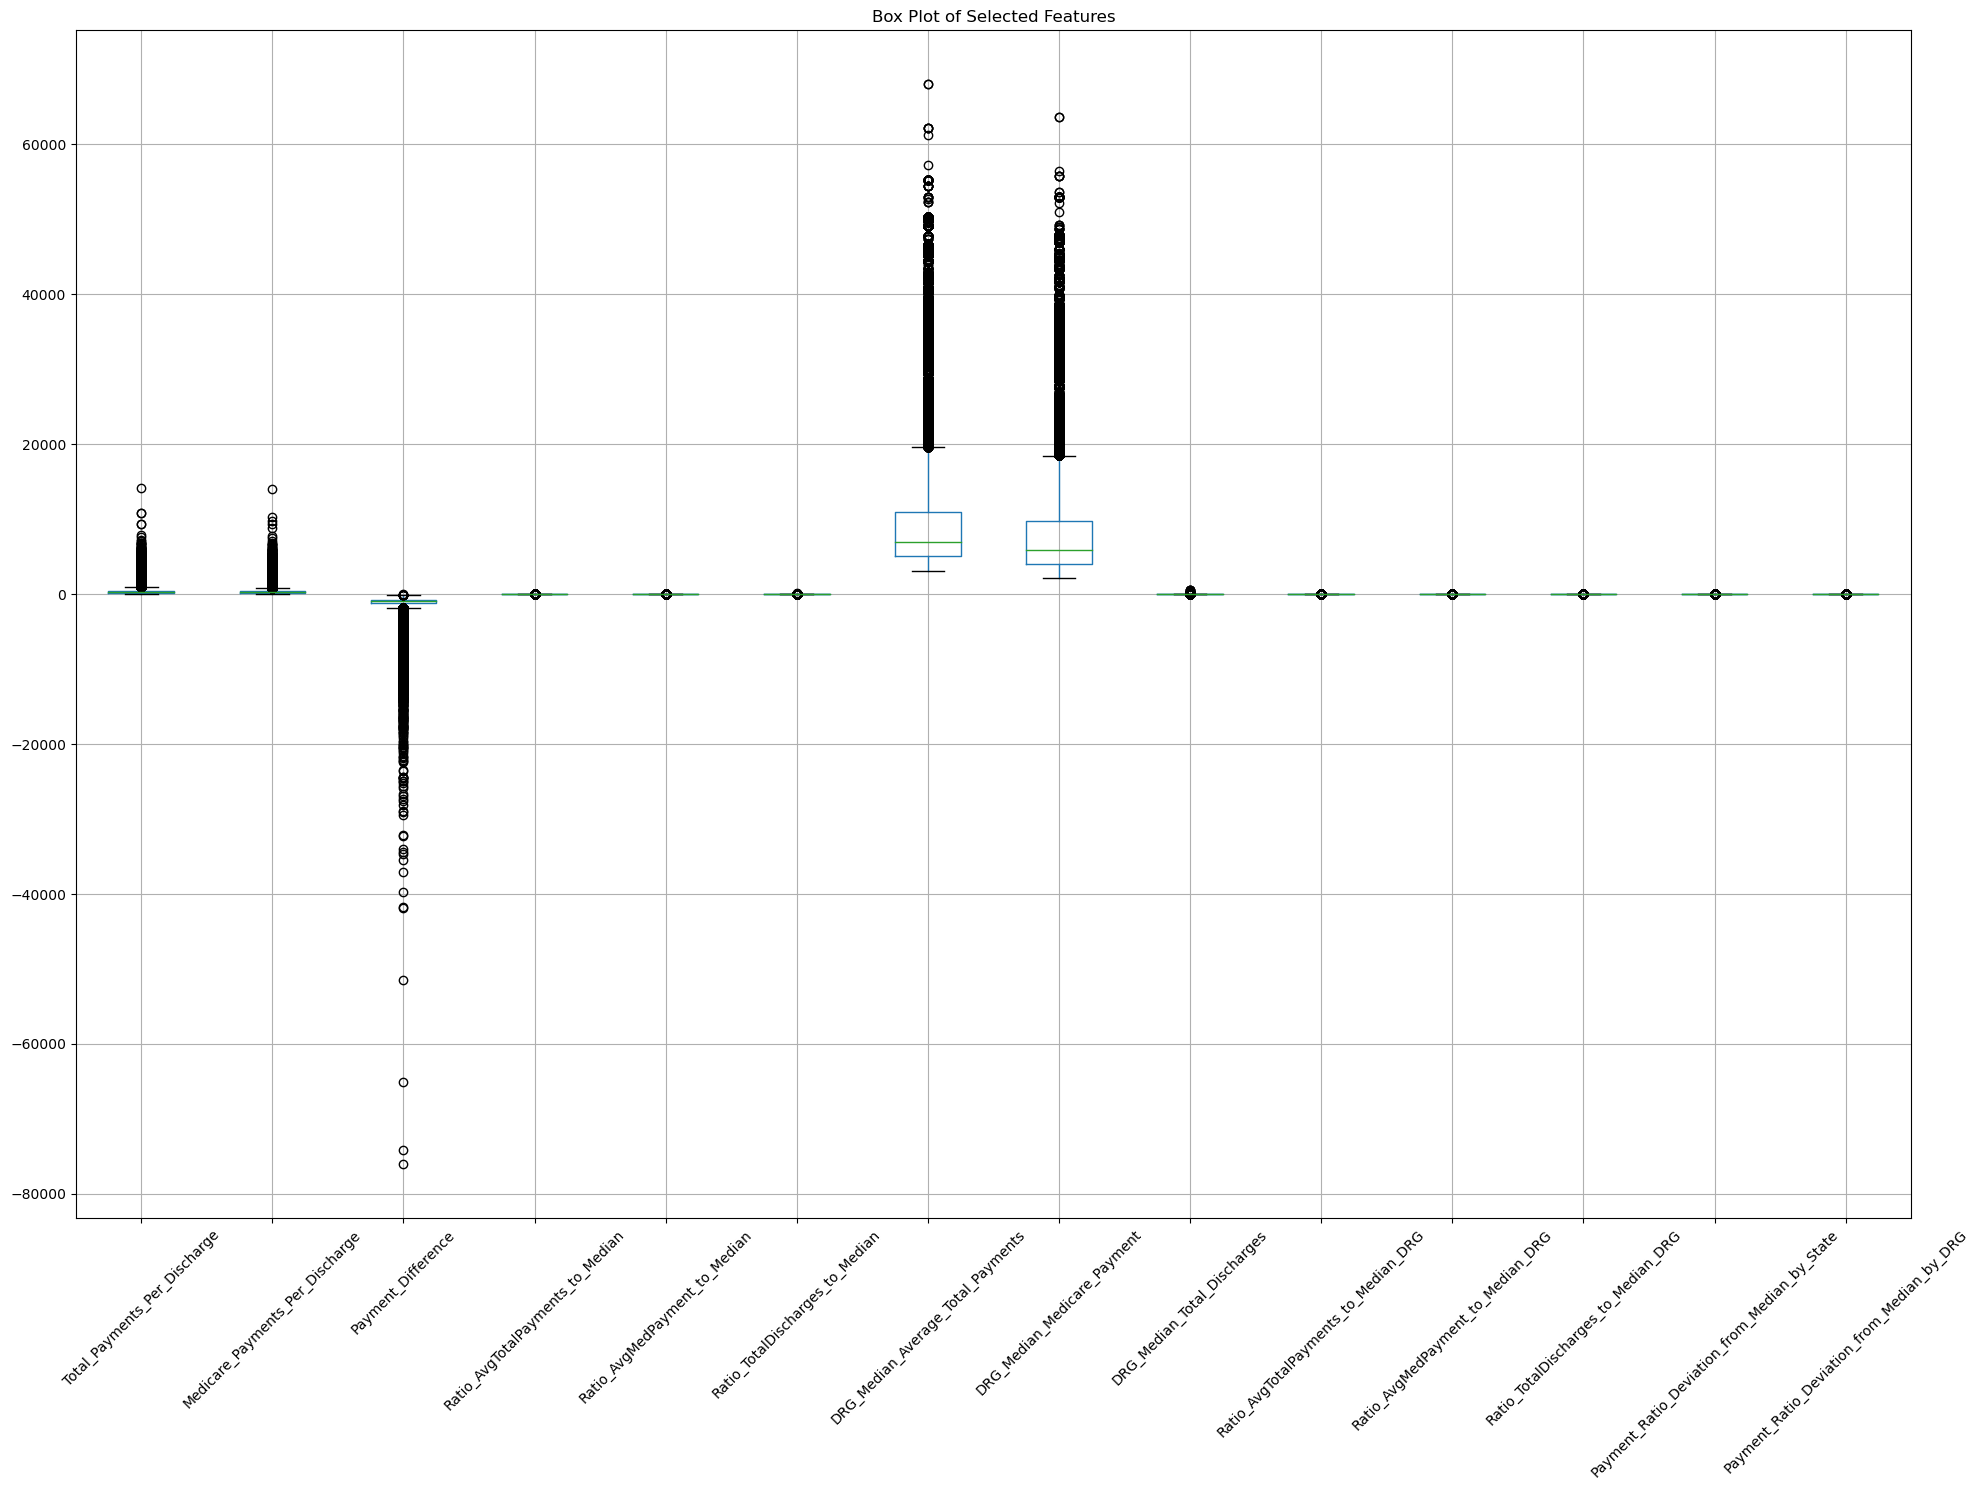

In [67]:
# Select the features for plotting
features_to_plot = ['Total_Payments_Per_Discharge',
                    'Medicare_Payments_Per_Discharge',
                    'Payment_Difference',
                    'Ratio_AvgTotalPayments_to_Median',
                    'Ratio_AvgMedPayment_to_Median',
                    'Ratio_TotalDischarges_to_Median',
                    'DRG_Median_Average_Total_Payments',
                    'DRG_Median_Medicare_Payment',
                    'DRG_Median_Total_Discharges',
                    'Ratio_AvgTotalPayments_to_Median_DRG',
                    'Ratio_AvgMedPayment_to_Median_DRG',
                    'Ratio_TotalDischarges_to_Median_DRG',
                    'Payment_Ratio_Deviation_from_Median_by_State',
                    'Payment_Ratio_Deviation_from_Median_by_DRG']

# Create a box plot for each feature
plt.figure(figsize=(20, 15))
data[features_to_plot].boxplot()
plt.title('Box Plot of Selected Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interpretation:
this box plot indicates there are some outliners in the features I created. Payment_Difference abnormal data could reach -80000 times. Understand there's anomalies in the dataset can help us know better about the data and further build models to identify these anomalies.